## Details
<b> Name : Pericherla Amshumaan Varma </br> RollNo : 17CS30025 </br> Code : Estimate production / yield of the crop given the climate and geographic conditions </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("estimate_yield.csv")
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       253
dtype: int64

In [5]:
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(51700, 7)
(253, 6)


In [6]:
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 7
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh']
column name : District_Name
No. of column : 116
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'DIMA HASAO' 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI' 'JORHAT' 'KAMRUP'
 'KAMRUP METRO' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR'
 'MARIGAON' 'NAGAON' 'NALBARI' 'SIVASAGAR' 'SONITPUR' 'TINSUKIA'
 'UDALGURI' 'ARARIA' 'ARWAL' 'AURANGABAD' 

In [7]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,9.714224e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,4.857112e-09
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1.559133e-06
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.113409e-06
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,8.014235e-07


# Data Visulization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


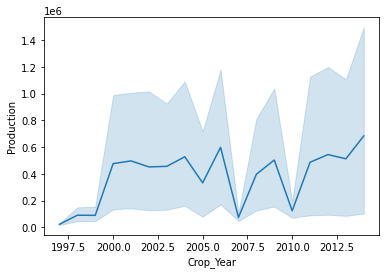

In [9]:
sns.lineplot(data["Crop_Year"],data["Production"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

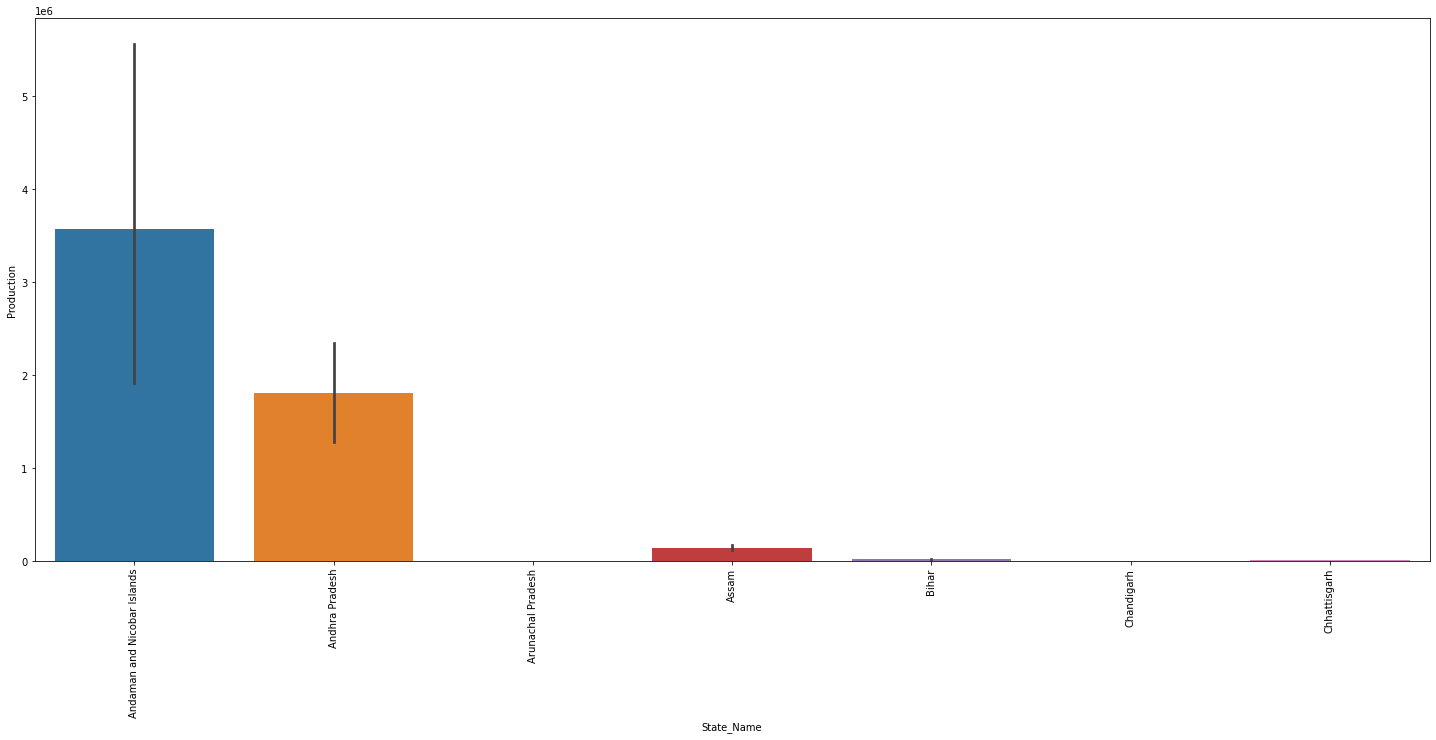

In [10]:
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


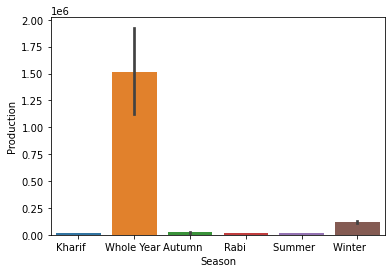

In [12]:
sns.barplot(data["Season"],data["Production"])

In [13]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,3.187838e+07
Kharif,3.049816e+08
Rabi,2.162039e+08
Summer,3.285227e+07
Whole Year,1.986911e+10
Winter,1.333412e+08


In [14]:
data["Crop"].value_counts()[:5]

Rice                 3904
Maize                3302
Moong(Green Gram)    2166
Dry chillies         1647
Arhar/Tur            1630
Name: Crop, dtype: int64

In [15]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
15,Coconut,1.947820e+10
59,Rice,3.585919e+08
67,Sugarcane,3.545939e+08
76,Wheat,8.321764e+07
35,Maize,5.346746e+07


## Rice

In [16]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(3904, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,0.000002
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,0.000001
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,0.000002


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


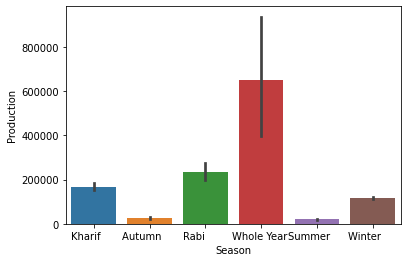

In [17]:
sns.barplot("Season","Production",data=rice_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


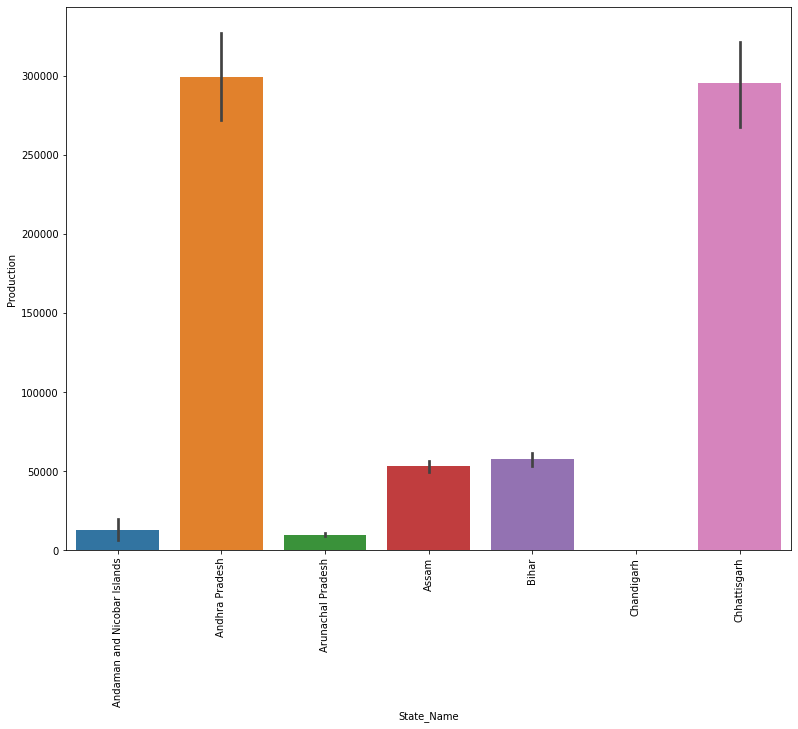

In [18]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [19]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
111,WEST GODAVARI,27845309.0,7.765181
35,EAST GODAVARI,24690929.0,6.885524
62,KRISHNA,20280606.0,5.655623
43,GUNTUR,18245831.0,5.088189
99,SPSR NELLORE,15252100.0,4.253331


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


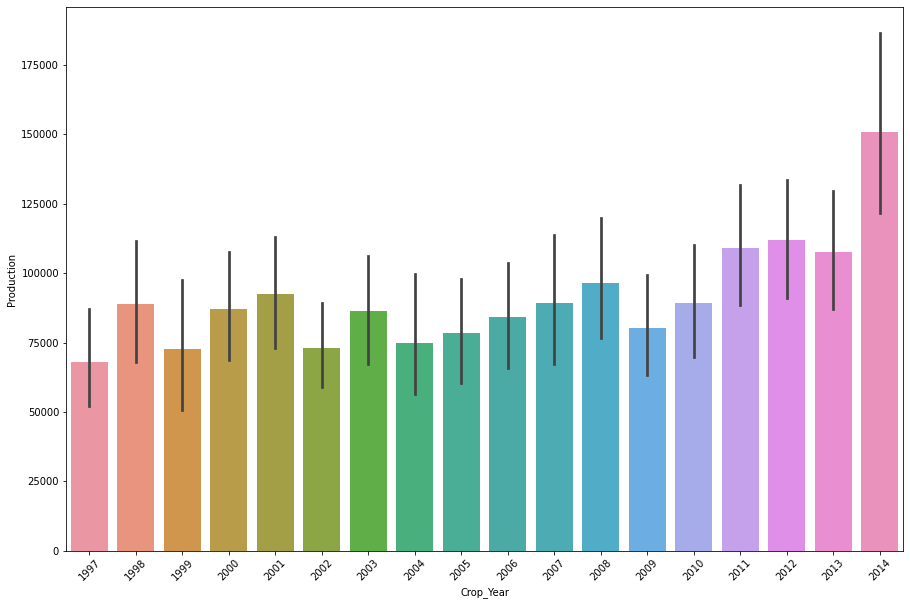

In [21]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


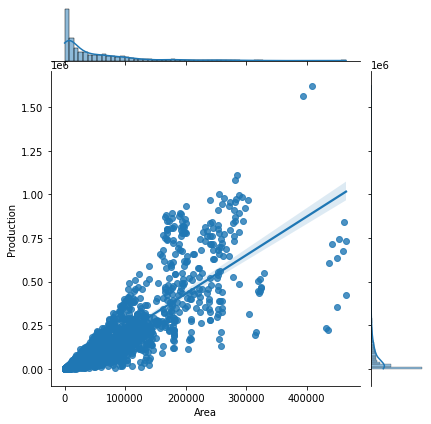

In [22]:
sns.jointplot("Area","Production",data=rice_df,kind="reg")


<b>From Data Visualization:
Rice production is mostly depends on Season, Area, State(place) </b>

##Coconut

In [23]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(587, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.316198
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.312944
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.327806


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


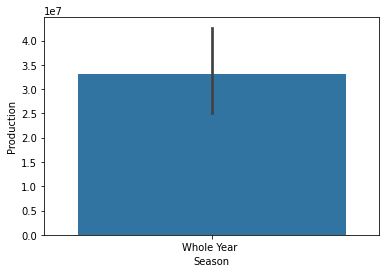

In [24]:
sns.barplot("Season","Production",data=coc_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


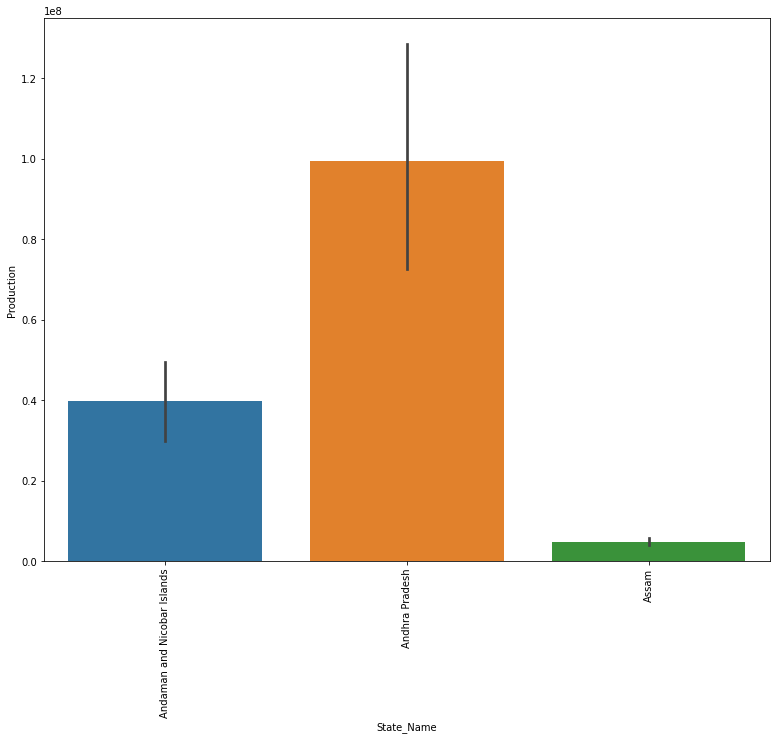

In [25]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [26]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
12,EAST GODAVARI,8.214998e+09,42.175344
42,WEST GODAVARI,4.201577e+09,21.570663
37,SRIKAKULAM,2.120553e+09,10.886800
40,VISAKHAPATANAM,9.662579e+08,4.960715
28,NAGAON,5.011797e+08,2.573029


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


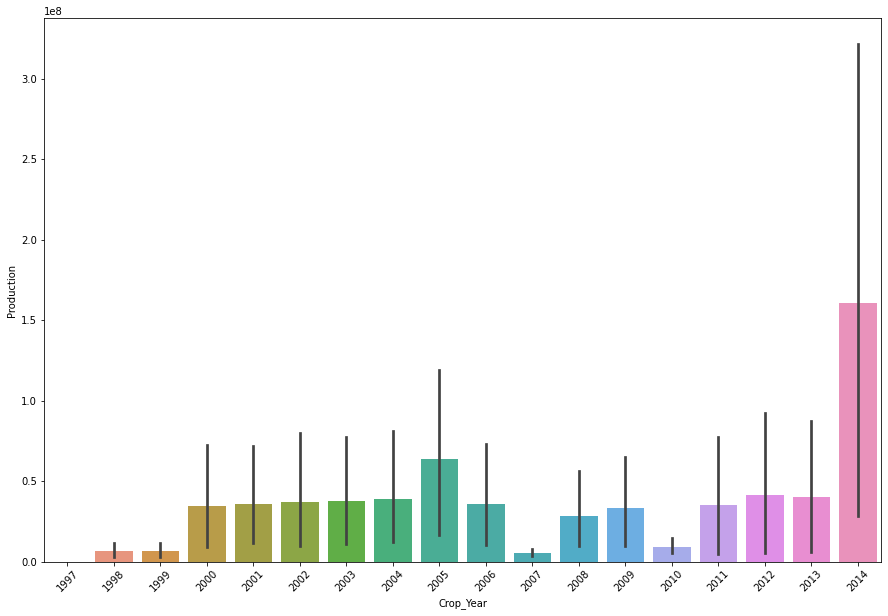

In [28]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


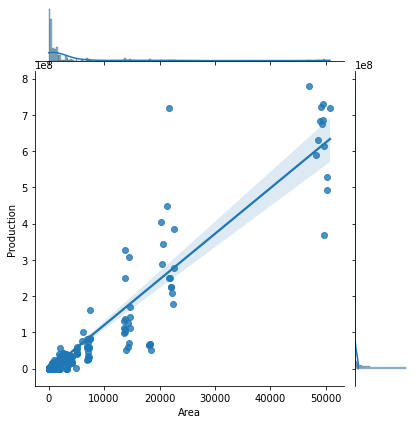

In [29]:
sns.jointplot("Area","Production",data=coc_df,kind="reg")

* cocunut production is directly proportional to area
* its production is also gradually increasing over a time of period
* production is highin kerala state
* it does not depends on season

##Sugarcane

In [30]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(1562, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,9.714224e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0,4.857112e-09
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0,1.942845e-07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


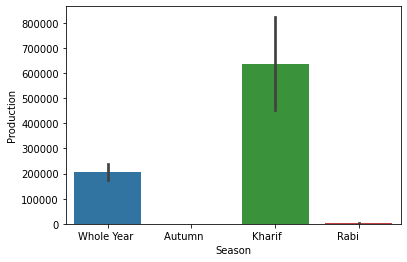

In [31]:
sns.barplot("Season","Production",data=sug_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


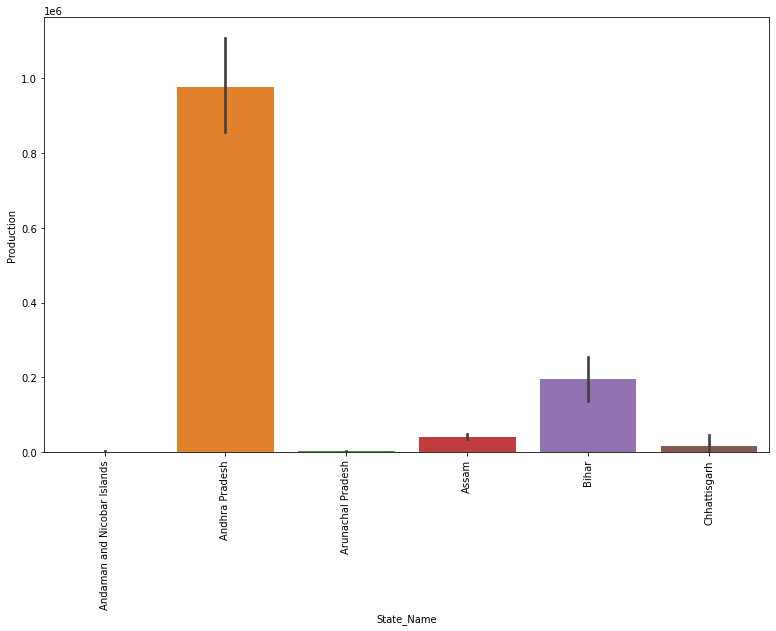

In [32]:
plt.figure(figsize=(13,8))
sns.barplot("State_Name","Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [33]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
81,PASHCHIM CHAMPARAN,56214711.0,15.853266
23,CHITTOOR,48539692.0,13.688813
108,WEST GODAVARI,48076585.0,13.558211
106,VISAKHAPATANAM,37783244.0,10.655357
61,KRISHNA,27246685.0,7.683913


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


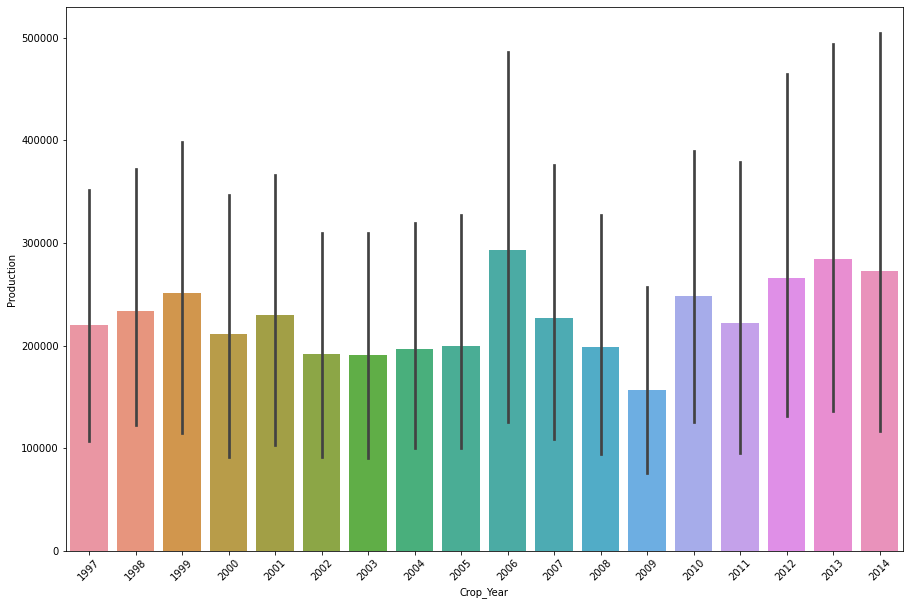

In [35]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=sug_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


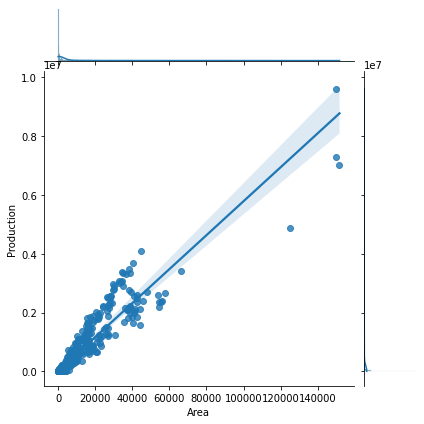

In [36]:
sns.jointplot("Area","Production",data=sug_df,kind="reg")

* Sugarecane production is directly proportional to area
* And the production is high in some state only.

# Feature Selection

In [37]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [38]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Beans & Mutter(Vegetable),Crop_Bhindi,Crop_Black pepper,Crop_Blackgram,Crop_Bottle Gourd,Crop_Brinjal,Crop_Cabbage,Crop_Cashewnut,Crop_Castor seed,Crop_Citrus Fruit,Crop_Coconut,Crop_Coriander,Crop_Cotton(lint),Crop_Cowpea(Lobia),Crop_Cucumber,Crop_Dry chillies,Crop_Dry ginger,Crop_Garlic,Crop_Ginger,...,Crop_Niger seed,Crop_Oilseeds total,Crop_Onion,Crop_Orange,Crop_Other Rabi pulses,Crop_Other Fresh Fruits,Crop_Other Kharif pulses,Crop_Other Vegetables,Crop_Paddy,Crop_Papaya,Crop_Peas (vegetable),Crop_Peas & beans (Pulses),Crop_Pineapple,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,9.714224e-06,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,4.857112e-09,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,1.559133e-06,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,3.113409e-06,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,8.014235e-07,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Test Train Split

In [39]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


x_train : (34639, 95)
x_test : (17061, 95)
y_train : (34639, 1)
y_test : (17061, 1)


In [40]:
x_train[:5]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Beans & Mutter(Vegetable),Crop_Bhindi,Crop_Black pepper,Crop_Blackgram,Crop_Bottle Gourd,Crop_Brinjal,Crop_Cabbage,Crop_Cashewnut,Crop_Castor seed,Crop_Citrus Fruit,Crop_Coconut,Crop_Coriander,Crop_Cotton(lint),Crop_Cowpea(Lobia),Crop_Cucumber,Crop_Dry chillies,Crop_Dry ginger,Crop_Garlic,Crop_Ginger,Crop_Gram,...,Crop_Niger seed,Crop_Oilseeds total,Crop_Onion,Crop_Orange,Crop_Other Rabi pulses,Crop_Other Fresh Fruits,Crop_Other Kharif pulses,Crop_Other Vegetables,Crop_Paddy,Crop_Papaya,Crop_Peas (vegetable),Crop_Peas & beans (Pulses),Crop_Pineapple,Crop_Pome Fruit,Crop_Pome Granet,Crop_Potato,Crop_Pulses total,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Samai,Crop_Sannhamp,Crop_Sapota,Crop_Sesamum,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
31793,762.0,1.714560e-06,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33433,108386.0,1.317011e-03,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48096,64.0,6.168532e-07,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32495,1560.0,7.339096e-05,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18567,153.0,2.399413e-06,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.9898710318792356


# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
preds = model.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,preds)
r = r2_score(y_test,preds)
print("R2score when we predict using Linear Regression is ", r)

R2score when we predict using Linear Regression is  0.87243561


# Prediction
Random Forest gives better R2 score. So we use the same for the prediction task

In [46]:
tst = test.drop(["District_Name","Crop_Year"],axis=1)
tst_dum = pd.get_dummies(tst)
tst_dum[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Cabbage,Crop_Castor seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(lint),Crop_Dry chillies,Crop_Dry ginger,Crop_Garlic,Crop_Gram,Crop_Groundnut,Crop_Horse-gram,Crop_Jowar,Crop_Jute,Crop_Linseed,Crop_Maize,Crop_Mesta,Crop_Moong(Green Gram),Crop_Niger seed,Crop_Onion,Crop_Other Rabi pulses,Crop_Other Kharif pulses,Crop_Peas & beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds
46,795.67,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51,17.00,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
623,1000.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
630,1000.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
698,8.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
y_test = tst_dum.copy()
print(x_train.shape)
print(y_test.shape)

(34639, 95)
(253, 56)


In [48]:
def common_member(x_train,x_test): 
    a_set =  set(x_train.columns.tolist())
    b_set =  set(x_test.columns.tolist())
    if (a_set & b_set): 
        return list(a_set & b_set) 

In [49]:
com_fea = common_member(x_train,tst_dum)
len(com_fea)

56

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train[com_fea],y_train)
preds = model.predict(y_test[com_fea])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
test["production"] = preds

In [53]:
test[:10]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,739.717400
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,21.037200
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,747.880000
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,801.865000
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,4.241667
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.00,14.708206
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.00,1.103333
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.00,1.680000
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.00,747.880000
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.00,997.296667
